# Visualisations of the Jaccard similarity vs. F-score

In [1]:
!mkdir -p images

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import sys

In [3]:
# functions for calculating metrics

EPSILON = 1e-30

def tf_precision_vec(true_labels, pred_labels):
    
    a = tf.stack([tf.math.round(pred_labels),true_labels], axis=1)
    good = tf.math.reduce_sum(
        tf.math.reduce_min(a, axis=1),
        axis=1
    )
    bad = tf.math.reduce_sum(tf.math.abs(a[:,0,:]-a[:,1,:]),axis=1)
    
    trues = tf.math.reduce_sum(true_labels, axis=1)
    predicted = tf.math.reduce_sum(tf.math.round(pred_labels), axis=1)
    
    ugly = good/(predicted+EPSILON)
    
    return ugly

def tf_recall_vec(true_labels, pred_labels):
    
    a = tf.stack([tf.math.round(pred_labels),true_labels], axis=1)
    good = tf.math.reduce_sum(
        tf.math.reduce_min(a, axis=1),
        axis=1
    )
    bad = tf.math.reduce_sum(tf.math.abs(a[:,0,:]-a[:,1,:]),axis=1)
    
    trues = tf.math.reduce_sum(true_labels, axis=1)
    predicted = tf.math.reduce_sum(tf.math.round(pred_labels), axis=1)
    
    ugly = good/(trues+EPSILON)
    
    return ugly

def tf_f1_score_vec(true_labels, pred_labels):
    
    a = tf.stack([tf.math.round(pred_labels),true_labels], axis=1)
    good = tf.math.reduce_sum(
        tf.math.reduce_min(a, axis=1),
        axis=1
    )
    bad = tf.math.reduce_sum(tf.math.abs(a[:,0,:]-a[:,1,:]),axis=1)
    
    trues = tf.math.reduce_sum(true_labels, axis=1)
    predicted = tf.math.reduce_sum(tf.math.round(pred_labels), axis=1)
    
    recall = good/(trues+EPSILON)
    precision = good/(predicted+EPSILON)
    
    f1 = 2*(precision*recall)/(precision+recall+EPSILON)
    
    return f1

def tf_jaccard_vec(true_labels, pred_labels):
    
    a = tf.stack([tf.math.round(pred_labels),true_labels], axis=1)
    good = tf.math.reduce_sum(
        tf.math.reduce_min(a, axis=1),
        axis=1
    )
    bad = tf.math.reduce_sum(tf.math.abs(a[:,0,:]-a[:,1,:]),axis=1)
    ugly = good/(good+bad+EPSILON)
    
    return ugly

def good_vec(true_labels, pred_labels):
    
    a = tf.stack([tf.math.round(pred_labels),true_labels], axis=1)
    good = tf.math.reduce_sum(
        tf.math.reduce_min(a, axis=1),
        axis=1
    )
    bad = tf.math.reduce_sum(tf.math.abs(a[:,0,:]-a[:,1,:]),axis=1)
    
    trues = tf.math.reduce_sum(true_labels, axis=1)
    predicted = tf.math.reduce_sum(tf.math.round(pred_labels), axis=1)
    
    ugly = good/(trues+EPSILON)
    
    return good

def bad_vec(true_labels, pred_labels):
    
    a = tf.stack([tf.math.round(pred_labels),true_labels], axis=1)
    good = tf.math.reduce_sum(
        tf.math.reduce_min(a, axis=1),
        axis=1
    )
    bad = tf.math.reduce_sum(tf.math.abs(a[:,0,:]-a[:,1,:]),axis=1)
    
    trues = tf.math.reduce_sum(true_labels, axis=1)
    predicted = tf.math.reduce_sum(tf.math.round(pred_labels), axis=1)
    
    ugly = good/(trues+EPSILON)
    
    return bad

In [4]:
# prepare data for demonstaration

def test_basket(tp, tn, fp=0, fn=0):
    basket_tp = [1. for x in  range(tp)]
    basket_tn = [0. for x in  range(tn)]
    basket_fp = [1. for x in  range(fp)]
    basket_fn = [0. for x in  range(fn)]
    

    return basket_tp+basket_tn+basket_fp+basket_fn

test_baskets = []

for i in range(101):
    test_baskets.append(test_basket(i, 100-i,))
    


true_baskets = []

for i in range(101):
    true_baskets.append([0. if x>=10 else 1. for x in range(100)])

In [5]:
print("true baskets for demonstration on too smaller predicted baskets:")
np_true_baskets = np.array(true_baskets)[:11, :10]
# show true baskets - ints are there for better readability
print(np_true_baskets.astype(int))
print("predicted baskets for demonstration on too smaller predicted baskets:")
np_test_baskets = np.array(test_baskets)[:11, :10]
# show test baskets - ints are there for better readability
print(np_test_baskets.astype(int))

true baskets for demonstration on too smaller predicted baskets:
[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]
predicted baskets for demonstration on too smaller predicted baskets:
[[0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1]]


For predicted baskets which are smaller than ground true baskets precision will be high, but recall small. This imbalance between recall and precision means, that F-score overestimates accuracy.

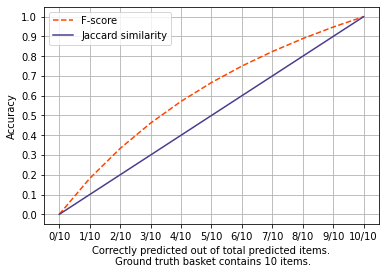

In [6]:
ax = pd.DataFrame(
    (
        list(tf_f1_score_vec(np_true_baskets, np_test_baskets).numpy()),
        list(tf_jaccard_vec(np_true_baskets, np_test_baskets).numpy()),
        list(tf_precision_vec(np_true_baskets, np_test_baskets).numpy()),
        list(tf_recall_vec(np_true_baskets, np_test_baskets).numpy()),

    ),
    index=['F-score', 'Jaccard similarity', 'Precision', 'Recall'],
    columns=[str(x[1])+'/'+str(x[1]+x[0]) for x in zip(
        list(bad_vec(np_true_baskets, np_test_baskets).numpy().astype(int)),
        list(good_vec(np_true_baskets, np_test_baskets).numpy().astype(int))
    )]
).transpose()[['F-score', 'Jaccard similarity']].plot(
    figsize=(6, 4),
    xticks=range(11),
    yticks=np.array(range(0, 11))/10,
    xlabel="Correctly predicted out of total predicted items.\n Ground truth basket contains 10 items.",
    ylabel="Accuracy",
    style=['--', '-'],
    color=['orangered', 'darkslateblue'],
    grid=True
)
ax.figure.savefig('images/fsc_jac_small-baskets.svg')

In [7]:
print("size of true baskets for demonstration on bigger than true predicted baskets:")
np_true_baskets = np.array(true_baskets)[10:, :]
# show true baskets - ints are there for better readability
print(np_true_baskets[::10].astype(int).sum(axis=1))
print("total size of predicted items in baskets for demonstration on too bigger than true predicted baskets:")
np_test_baskets = np.array(test_baskets)[10:, :]
# show test baskets - ints are there for better readability
print(np_test_baskets[::10].astype(int).sum(axis=1))

size of true baskets for demonstration on bigger than true predicted baskets:
[10 10 10 10 10 10 10 10 10 10]
total size of predicted items in baskets for demonstration on too bigger than true predicted baskets:
[ 10  20  30  40  50  60  70  80  90 100]


For predicted baskets which are bigger than ground true baskets recall will be high, but precision small. This imbalance between recall and precision means, that again F-score overestimates accuracy.

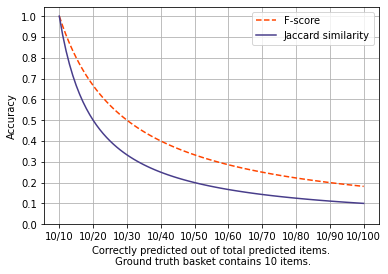

In [8]:
ax = pd.DataFrame(
    (
        list(tf_f1_score_vec(np_true_baskets, np_test_baskets).numpy()),
        list(tf_jaccard_vec(np_true_baskets, np_test_baskets).numpy()),
        list(tf_precision_vec(np_true_baskets, np_test_baskets).numpy()),
        list(tf_recall_vec(np_true_baskets, np_test_baskets).numpy()),

    ),
    index=['F-score', 'Jaccard similarity', 'Precision', 'Recall'],
    columns=[str(x[1])+'/'+str(x[1]+x[0]) for x in zip(
        list(bad_vec(np_true_baskets, np_test_baskets).numpy().astype(int)),
        list(good_vec(np_true_baskets, np_test_baskets).numpy().astype(int))
    )]
).transpose()[['F-score', 'Jaccard similarity']].plot(
    figsize=(6, 4),
    xticks=range(0, 100, 10),
    yticks=np.array(range(0, 11))/10,
    xlabel="Correctly predicted out of total predicted items.\n Ground truth basket contains 10 items.",
    ylabel="Accuracy",
    style=['--', '-'],
    color=['orangered', 'darkslateblue'],
    grid=True
)
ax.figure.savefig('images/fsc_jac_big-baskets.svg')